<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#проведем-необходимые-импорты" data-toc-modified-id="проведем-необходимые-импорты-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>проведем необходимые импорты</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Разделим-данные-на-обучающую-и-тестовую-выборки" data-toc-modified-id="Разделим-данные-на-обучающую-и-тестовую-выборки-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Разделим данные на обучающую и тестовую выборки</a></span></li><li><span><a href="#обучаем-модель-на-обычных-данных" data-toc-modified-id="обучаем-модель-на-обычных-данных-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>обучаем модель на обычных данных</a></span></li><li><span><a href="#Обучаем-модель-на-зашифрованных-данных" data-toc-modified-id="Обучаем-модель-на-зашифрованных-данных-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Обучаем модель на зашифрованных данных</a></span></li><li><span><a href="#Сравним-результаты" data-toc-modified-id="Сравним-результаты-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Сравним результаты</a></span></li></ul></li><li><span><a href="#Подведем-итоги" data-toc-modified-id="Подведем-итоги-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Подведем итоги</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Чтобы провести эту работу, нам необходимо разработать алгоритм шифрования данных, чтобы исходные данные было сложно получить.

Работа пройдет в 4 этапа:

1. Изучение данных
2. Ответ на вопрос "Признаки умножают на обратимую матрицу. Поменяется ли качество модели линейной регрессии" и обоснование ответа.
3. Разработка алгоритма
4. Проверка алгоритма

## проведем необходимые импорты

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.metrics import r2_score

## Загрузка данных

In [74]:
df = pd.read_csv('/datasets/insurance.csv')

In [75]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Признаки:
- Пол
- Возраст
- Зарплата
- Члены семьи

Целевой признак:
- Страховые вылпаты (количество страховых выплат клиенту за последние 5 лет.)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропусков в данных нет

In [77]:
df.duplicated().sum()

153

In [78]:
df[((df['Пол'] == 1) & (df['Возраст'] == 39.0)&(df['Зарплата'] == 48100.0))]


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
69,1,39.0,48100.0,1,0
281,1,39.0,48100.0,1,0


В данных есть явные дубликаты, в этом мы можем наглядно убедиться. Избавимся от этих явных дубликатов.

(или может совпасть, что все 4 параметра одинаковые и это не дубликат, но мы все-таки будем отталкиваться от того, что это дубликат)

In [79]:
df = df.drop_duplicates()

In [80]:
df.duplicated().sum()

0

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                4847 non-null   int64  
 1   Возраст            4847 non-null   float64
 2   Зарплата           4847 non-null   float64
 3   Члены семьи        4847 non-null   int64  
 4   Страховые выплаты  4847 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 227.2 KB


In [82]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


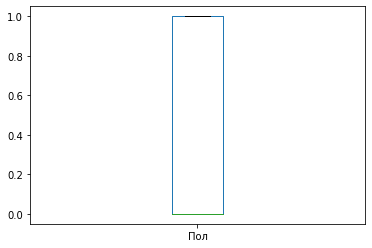

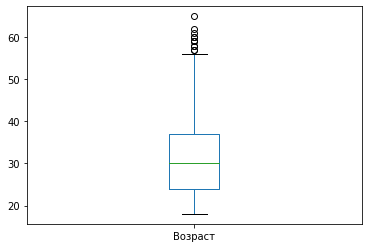

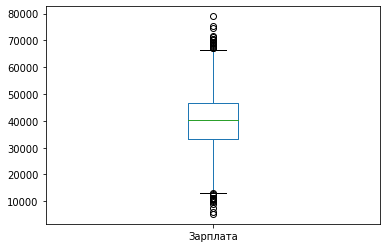

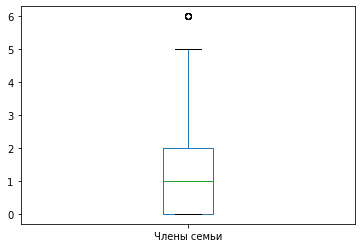

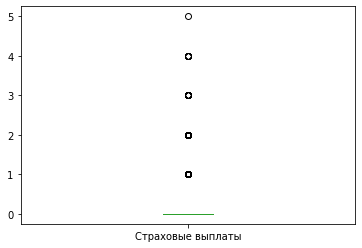

In [83]:
cols = df.columns

for col in cols:
    df[col].plot(kind='box')
    plt.show()
    

Выбросов в данных нет, все значения находятся в пределах нормы

Но в целевом признаке видим явный дисбаланс, возможно придется применить технику `bootstrap`

**Вывод**

Рассмотрели данные. Пропусков обнаружено не было. Типы данных установлены правильные. 

Были обнаружены явные дубликаты, их мы удалили. Неявных дбликатов быть не может, так как в датасете нет объектов типа object

Данные подготовлены и с ними можно начинать работу. 

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Ответьте на вопрос и обоснуйте решение. 

 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
- a. Изменится. Приведите примеры матриц.
- b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:** `b`. Не изменится.

**Обоснование:** 

Рассмотрим        $(Z^T Z)^{-1} Z^T y$

Пусть Z = XP. Подставим это в нашу формулу обучения

$$
((XP)^T XP)^{-1} (XP)^T y = p^{-1} ((XP)^T X)^{-1} (XP)^T y    
$$

Докажем, что можем выполнить такое действие, то есть $(AB)^{-1}=B^{-1}A^{-1}$


Для этого достаточно доказать два равенства:

$$
1) (AB)B^{-1}A^{-1} = E
$$

$$
2) B^{-1}A^{-1}AB=E
$$

Перейдем к доказательству

$$
1) (AB)B^{-1}A^{-1}=A(BB^{-1})A^{-1}=AEA^{-1}=AA^{-1}=E
$$

$$
2) B^{-1}A^{-1}(AB)=B^{-1}(A^{-1}A)B=B^{-1}EB=B^{-1}B=E
$$

**ЧТД**


А по свойству транспонирования матриц

$$
=> P^{-1}((XP)^T X)^{-1} (XP)^T y = P^{-1}(P^T X^T X)^{-1} P^T X^T y
$$



$$
P^{-1}(X^TX)^{-1} (P^T)^{-1} P^T X^T y =P^{-1}(X^TX)^{-1} ((P^T)^{-1} P^T) X^T y = P^{-1}(X^T X)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y
$$

$$
w = (X^T X)^{-1} X^T y
$$

$$
w_p = P^{-1} (X^T X)^{-1} X^T Y = P^{-1} w
$$

$$
a_p = Z w_p = X P P^{-1} w = X E w = X w = a
$$

ЧТД

## Алгоритм преобразования

**Алгоритм**

1. Разделить данные на признаки и целевой признак
2. Берем случайную  матрицу квадратную размером n n, где n - количество признаков в наших данных. 
3. Проверяем, что случайная матрица обратима, если нет - смотреть на второй пункт. Эта матрица будем ключом.
4. Перемножаем матрицу признаков и ключ по правилам матричного перемножения.
5. Обучаем модель на преобразованных данных

**Обоснование**

Качество моедли не должно измениться, так как мы это доказали в прошлом пункте.

## Проверка алгоритма

Приступим к проверке нашего алгоритма

### Разделим данные на обучающую и тестовую выборки

In [84]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)



Масштабируем данные

In [85]:
scaler = StandardScaler()

scaler.fit(features_train)

features_train_scaled= scaler.transform(features_train)
features_test_scaled = scaler.transform(features_test)

### обучаем модель на обычных данных

In [86]:
 # b - before, то есть до "зашифрования"
model_b = LinearRegression()


model_b.fit(features_train_scaled, target_train)

LinearRegression()

In [87]:

predictions_b = model_b.predict(features_test_scaled)


In [88]:
r2_b = r2_score(target_test, predictions_b)
print(f'Метрика R2 имеет значение {r2_b} на выборке до зашифрования')

Метрика R2 имеет значение 0.4160549216151216 на выборке до зашифрования


Результат ужасный. Проверим как зашифрование повлияет на коэффициент детерминации, но задача стоит просто проверить как меняется или не меняется оценка качества. В данном случае можно было бы использовать технику bootstrap, чтобы избавиться от дисбаланса

### Обучаем модель на зашифрованных данных

In [89]:

def get_rand_matrix(n):
    '''
    Функция создает случайные матрицы, до тех пор пока не получится сгенерировать обратимую матрицу
    '''
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(n, n))
        det = np.linalg.det(matrix)
    return matrix



n = features.shape[1]

key = get_rand_matrix(n)

key = pd.DataFrame(key).values 


        
    
# print(np.linalg.inv(key))
#     try:
#         linalg.inv(key)
#         break
#     except:
#         print('Попалась необратимая матрица')
            
    
            

# for ni in range(n):    
#     key_ni = [[]]
#     for _ in range(n):
#         key_ni[0].append(np.random.normal())
        
#     key_ni = np.array(key_ni)
#     key = np.append(key, key_ni)

print('Ключ и обратная ключу матрицы перемножаются и получается единичная матрица.')
display(key @ np.linalg.inv(key))
print()    
print('Ключ')
key

Ключ и обратная ключу матрицы перемножаются и получается единичная матрица.


array([[ 1.00000000e+00, -1.54535965e-17,  8.71041056e-17,
        -1.61172006e-16],
       [-1.21433461e-16,  1.00000000e+00,  3.76629543e-17,
        -3.90720596e-17],
       [ 1.55820290e-16, -1.57908616e-16,  1.00000000e+00,
        -2.11913270e-16],
       [ 8.43557740e-17, -2.49399923e-16,  2.95329777e-18,
         1.00000000e+00]])


Ключ


array([[-1.34754114,  0.63977932, -0.20652727, -0.05941191],
       [ 0.48954956, -0.22216479,  1.22923401,  0.39602488],
       [-1.13452466,  0.29319015,  0.38595932, -2.09089568],
       [-0.34145895,  0.52406436, -1.16096232,  0.33234123]])

In [90]:
features_train_scaled_chifed = features_train_scaled @ key
features_test_scaled_chifed = features_test_scaled @ key
features_test_scaled_chifed.shape

(970, 4)

**Проверим, что данные дейстивтельно поменялись**

In [91]:
display(features_test_scaled)
features_test_scaled_chifed


array([[ 1.0106317 , -0.94337032,  0.7334375 , -1.11240251],
       [ 1.0106317 ,  0.1164861 ,  2.60218699, -1.11240251],
       [ 1.0106317 ,  0.23424792, -0.5956731 ,  0.71504856],
       ...,
       [ 1.0106317 , -0.8256085 ,  1.57287578, -0.19867697],
       [ 1.0106317 , -1.06113214, -0.88547917, -0.19867697],
       [-0.98948014,  1.41186616, -0.81552598,  1.6287741 ]])

array([[-2.27595746,  0.48823108,  0.20618854, -2.3368802 ],
       [-3.8772476 ,  0.80066724,  2.23026138, -5.82451094],
       [-0.81554573,  0.79462561, -0.98082751,  1.51585487],
       ...,
       [-3.4826704 ,  1.18703456, -0.38586651, -3.74175278],
       [-0.80890658,  0.51859418, -1.62420518,  1.30513774],
       [ 2.39361851, -0.33223762, -0.26583667,  2.86440956]])

In [92]:
model_a = LinearRegression() # a - after, то есть после "зашифрования"

model_a.fit(features_train_scaled_chifed, target_train)

LinearRegression()

In [93]:
predictions_a = model_a.predict(features_test_scaled_chifed)


In [94]:
r2_a = r2_score(target_test, predictions_a)
print(f'Метрика R2 имеет значение {r2_a} на выборке после зашифрования')

Метрика R2 имеет значение 0.4160549216151216 на выборке после зашифрования


### Сравним результаты 

In [95]:
print('Качество модели до шифрования', r2_b)
print('Качество модели после шифрования', r2_a)

Качество модели до шифрования 0.4160549216151216
Качество модели после шифрования 0.4160549216151216


Как мы видим качество практически не поменялось. Значит все отлично

## Подведем итоги

Нам нужно было защитить данные клиентов страховой компании «Хоть потоп». Мы разработали такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновали корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требовалось.


Работа пройдет в 4 этапа:

1. Изучение данных
2. Ответ на вопрос "Признаки умножают на обратимую матрицу. Поменяется ли качество модели линейной регрессии" и обоснование ответа.
3. Разработка алгоритма
4. Проверка алгоритма

**Итого**

Алгоритм разработан, он показал свою пригодность и мы проверили это на практике.

После использования алгоритма качество модели изменилось настолько незначительно, что это изменение можно не замечать.
